In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x=np.array([1,2,3,4,5])
y=np.array([2.1,3.8,6.5,9.2,11.3])


In [4]:
x_b=np.c_[np.ones((x.shape[0],1)),x]
x_b

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [5]:
alpha_ridge=1.0 #penalty value
alpha_lasso=0.1
epochs=1000
lr=0.01

In [9]:
def lasso_regression(x,y,alpha,epochs,lr):
  m,n=x.shape
  theta=np.zeros(n)
  for _ in range(epochs):
    y_pred=x.dot(theta)
    gradient=(x.T.dot(y_pred-y)+alpha * np.sign(theta))/n
    theta -= lr*gradient
  return theta

In [11]:
def ridge_regression(x,y,alpha,epochs,lr):
  m,n=x.shape
  theta=np.zeros(n)
  for _ in range(epochs):
    y_pred=x.dot(theta)
    gradient=(x.T.dot(y_pred-y)+alpha * (theta))/n
    theta -= lr*gradient
  return theta

In [14]:
theta_lasso=ridge_regression(x_b,y,alpha_ridge,epochs,lr)
theta_ridge=lasso_regression(x_b,y,alpha_lasso,epochs,lr)


array([-0.40848219,  2.33680975])

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


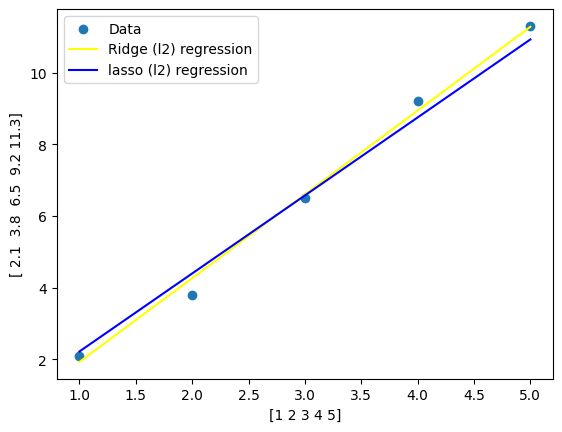

In [15]:
plt.scatter(x,y,label='Data')
plt.plot(x,x_b.dot(theta_ridge),label=f'Ridge (l2) regression',color='yellow')
plt.plot(x,x_b.dot(theta_lasso),label=f'lasso (l2) regression',color='blue')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()